In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("RareTech.csv")
df

,Thickness,Temp1In,Temp1Out,Temp2In,Temp2Out,Fluid1,Fluid2,Q,Qr,Lmtd,...,m2,dP1,dP2,V1In,V2In,A,M,Ae,Me,NP
0,0.4,68,63,57,67.983879,21,2,409.90869,68.318115,1.010893,...,8.880000,31.118763,0.055657,0.923382,0.193251,272.000000,0.0,271.00000,-0.002742,544
1,0.4,41,34,30,40.912361,43,15,552.38190,276.190950,1.023957,...,12.056000,65.931900,0.912950,0.481648,0.123881,661.500000,1.0,655.50000,1.022099,441
2,0.4,69,76,80,69.091515,44,33,383.84174,76.768349,1.034661,...,17.476000,21.075848,20.430326,0.358412,0.229760,336.660000,0.0,335.42001,0.008512,543
3,0.4,65,71,76,65.055916,39,37,407.14093,50.892616,1.100313,...,18.593000,13.825015,7.377956,0.626421,0.343003,260.000000,0.0,259.00000,0.002274,520
4,0.4,61,56,50,60.970310,17,9,272.18390,68.045975,1.124625,...,12.700000,80.974846,42.663013,0.408757,0.206544,306.280000,12.0,305.04001,12.239405,494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59260,0.4,75,68,15,19.792377,11,3,421.74042,421.740420,54.096302,...,21.087000,28.692713,54.060726,1.958433,2.696615,6.160000,356.0,5.72000,353.424130,28
59261,0.4,18,23,77,72.853760,1,140,613.31781,613.317810,54.425762,...,35.826000,39.341637,51.828972,3.739587,4.688278,11.440000,517.0,11.00000,520.430910,52
59262,0.4,18,24,77,74.605110,140,140,383.41486,383.414860,54.782787,...,38.749001,14.506055,71.275032,2.009481,5.070789,10.120000,661.0,9.68000,684.705440,46
59263,0.4,18,23,78,73.419159,42,9,283.69046,141.845230,55.209312,...,30.702000,10.943467,6.670627,2.204358,2.268029,38.279999,250.0,37.84000,260.927670,174


In [3]:
df.columns

Index(['Thickness', 'Temp1In', 'Temp1Out', 'Temp2In', 'Temp2Out', 'Fluid1',
       'Fluid2', 'Q', 'Qr', 'Lmtd', 'Theta1', 'Theta2', 'm1', 'm2', 'dP1',
       'dP2', 'V1In', 'V2In', 'A', 'M', 'Ae', 'Me', 'NP'],
      dtype='object')

In [4]:
selected_features = [
    'Temp1In', 'Temp2In', 'Fluid1', 'Fluid2',
    'm1', 'm2', 'V1In', 'V2In',
    'dP1', 'dP2', 'Thickness',
    'A', 'Ae', 'M', 'Me', 'NP'
]

X = df[selected_features]  # Feature set
y = df['Q']  # Target variable

In [5]:
print(X.isnull().sum())
print(y.isnull().sum())

Temp1In      0
Temp2In      0
Fluid1       0
Fluid2       0
m1           0
m2           0
V1In         0
V2In         0
dP1          0
dP2          0
Thickness    0
A            0
Ae           0
M            0
Me           0
NP           0
dtype: int64
0


In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#define
rf = DecisionTreeRegressor(random_state=42)

#fit
rf.fit(X_train, y_train)

#predict
y_pred = rf.predict(X_test)

#evaluate
print("R^2 Score:", r2_score(y_test, y_pred))

R^2 Score: 0.7932333462984031


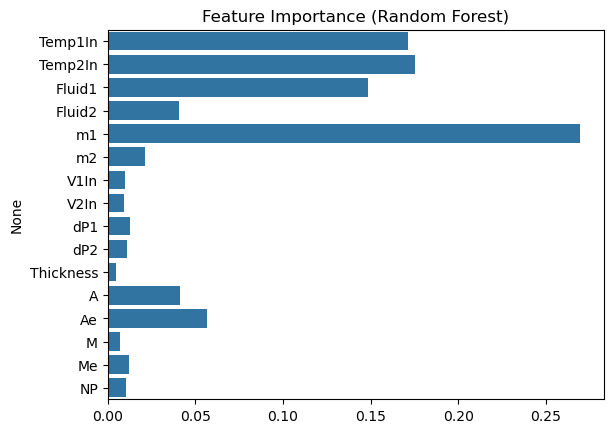

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = rf.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#define
rf = LinearRegression()

#fit
rf.fit(X_train, y_train)

#predict
y_pred1 = rf.predict(X_test)

#evaluate
print("R^2 Score:", r2_score(y_test, y_pred1))

R^2 Score: 0.3754814451069386


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#define
rf = RandomForestRegressor(random_state=42)

#fit
rf.fit(X_train, y_train)

#predict
y_pred2 = rf.predict(X_test)

#evaluate
print("R^2 Score:", r2_score(y_test, y_pred2))

R^2 Score: 0.9170367485356814
